# Import Libraries

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance
from catboost import CatBoostRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Dataset

In [19]:
df = pd.read_csv('Shopping Trends And Customer Behaviour Dataset.csv')
df

,Unnamed: 0,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,0,1,55,Male,Blouse,Clothing,53,Kentucky,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,1,2,19,Male,Sweater,Clothing,64,Maine,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,2,3,50,Male,Jeans,Clothing,73,Massachusetts,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,3,4,21,Male,Sandals,Footwear,90,Rhode Island,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,4,5,45,Male,Blouse,Clothing,49,Oregon,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3895,3896,40,Female,Hoodie,Clothing,28,Virginia,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3896,3897,52,Female,Backpack,Accessories,49,Iowa,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3897,3898,46,Female,Belt,Accessories,33,New Jersey,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3898,3899,44,Female,Shoes,Footwear,77,Minnesota,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


## Check The Data

In [20]:
df.shape

(3900, 18)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3900 non-null   int64  
 1   Customer ID             3900 non-null   int64  
 2   Age                     3900 non-null   int64  
 3   Gender                  3900 non-null   object 
 4   Item Purchased          3900 non-null   object 
 5   Category                3900 non-null   object 
 6   Purchase Amount (USD)   3900 non-null   int64  
 7   Location                3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [22]:
df.describe()

,Unnamed: 0,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1949.500000,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,1125.977353,15.207589,23.685392,0.716223,14.447125
min,0.000000,1.000000,18.000000,20.000000,2.500000,1.000000
25%,974.750000,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1949.500000,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2924.250000,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3899.000000,3900.000000,70.000000,100.000000,5.000000,50.000000


In [23]:
df.sample

<bound method NDFrame.sample of       Unnamed: 0  Customer ID  Age  Gender Item Purchased     Category  \
0              0            1   55    Male         Blouse     Clothing   
1              1            2   19    Male        Sweater     Clothing   
2              2            3   50    Male          Jeans     Clothing   
3              3            4   21    Male        Sandals     Footwear   
4              4            5   45    Male         Blouse     Clothing   
...          ...          ...  ...     ...            ...          ...   
3895        3895         3896   40  Female         Hoodie     Clothing   
3896        3896         3897   52  Female       Backpack  Accessories   
3897        3897         3898   46  Female           Belt  Accessories   
3898        3898         3899   44  Female          Shoes     Footwear   
3899        3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location      Color  Season  Review Rating  \

In [24]:
df.nunique()

Unnamed: 0                3900
Customer ID               3900
Age                         53
Gender                       2
Item Purchased              25
Category                     4
Purchase Amount (USD)       81
Location                    50
Color                       25
Season                       4
Review Rating               26
Subscription Status          2
Shipping Type                6
Discount Applied             2
Promo Code Used              2
Previous Purchases          50
Payment Method               6
Frequency of Purchases       7
dtype: int64

## Exploratory Data Analysis

In [25]:
df = df.drop('Unnamed: 0', axis=1)
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [26]:
df.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [27]:
df.duplicated().sum()

0

In [28]:
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(include='object').columns

print(f"num columns : {list(num_cols)}")
print(f"cat columns : {list(cat_cols)}")
print(len(num_cols))
print(len(cat_cols))

num columns : ['Customer ID', 'Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
cat columns : ['Gender', 'Item Purchased', 'Category', 'Location', 'Color', 'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Payment Method', 'Frequency of Purchases']
5
12


## Visualization

### 1. Histogram Of Num_Cols

<Figure size 1200x600 with 0 Axes>

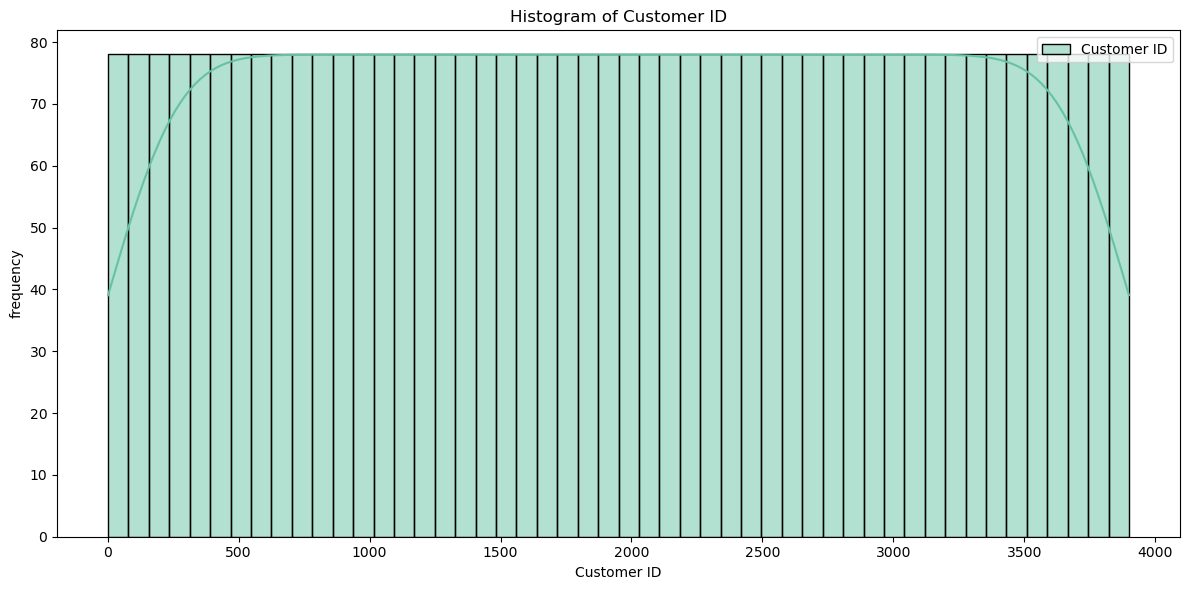

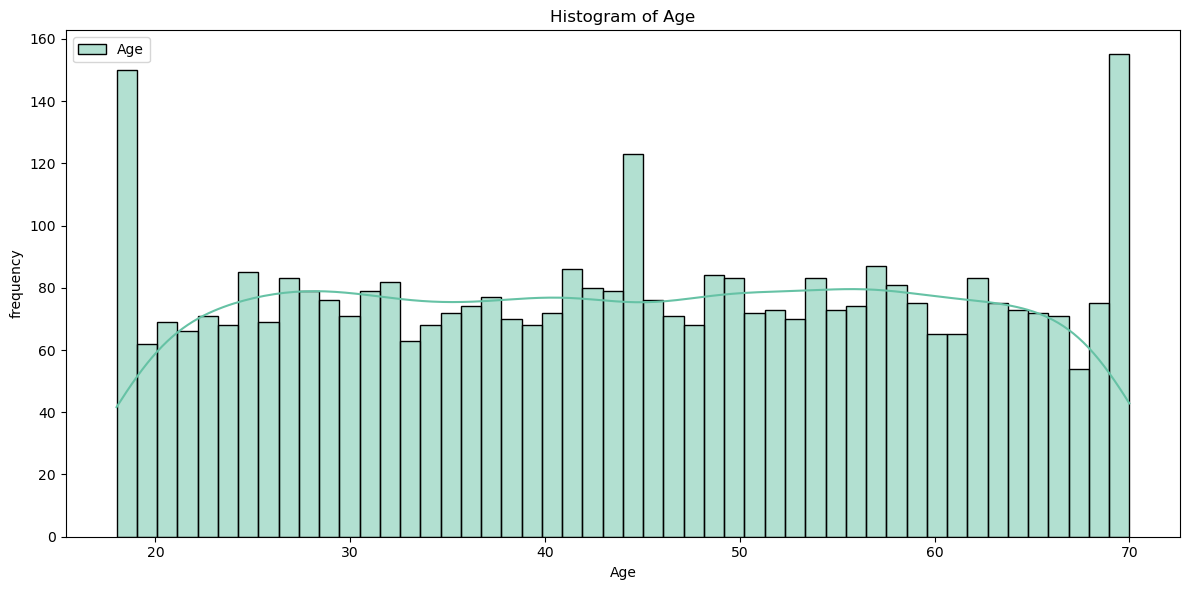

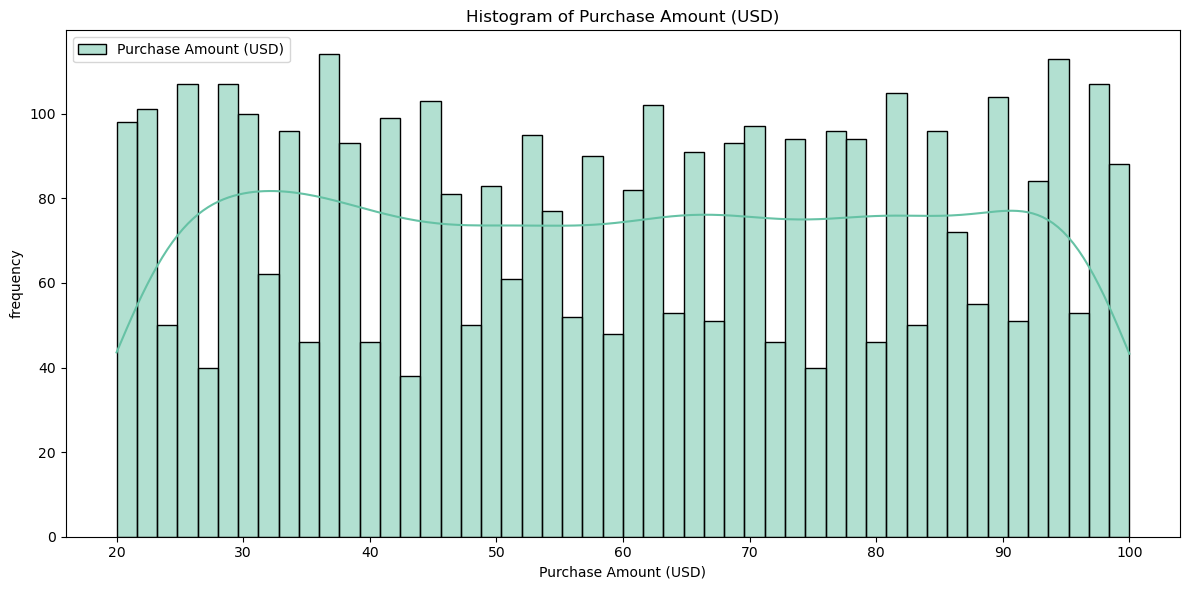

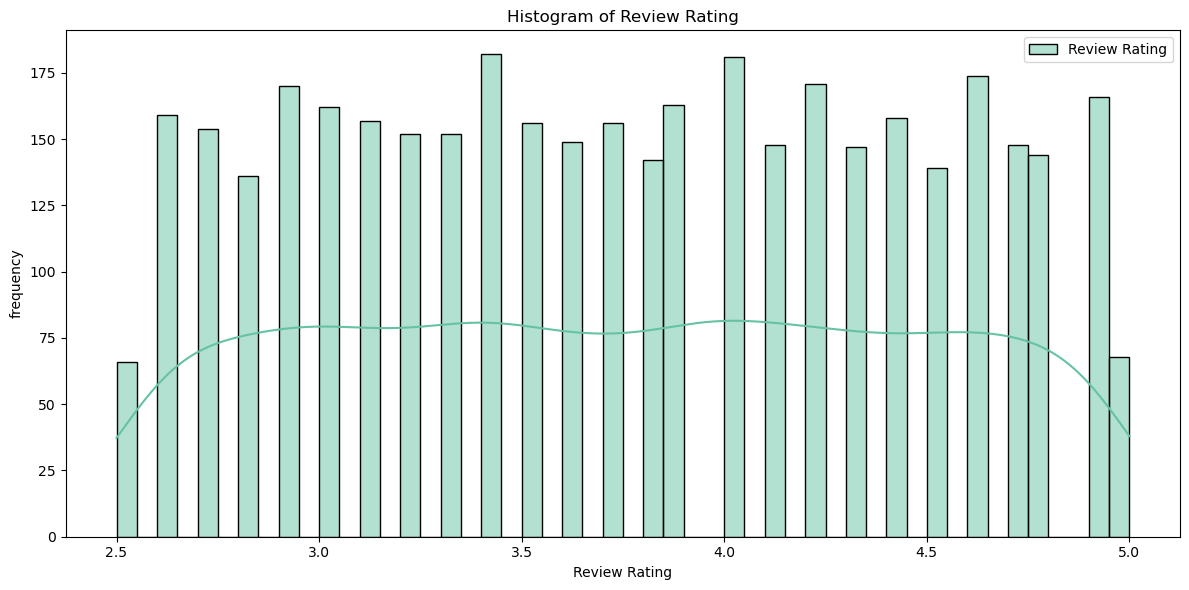

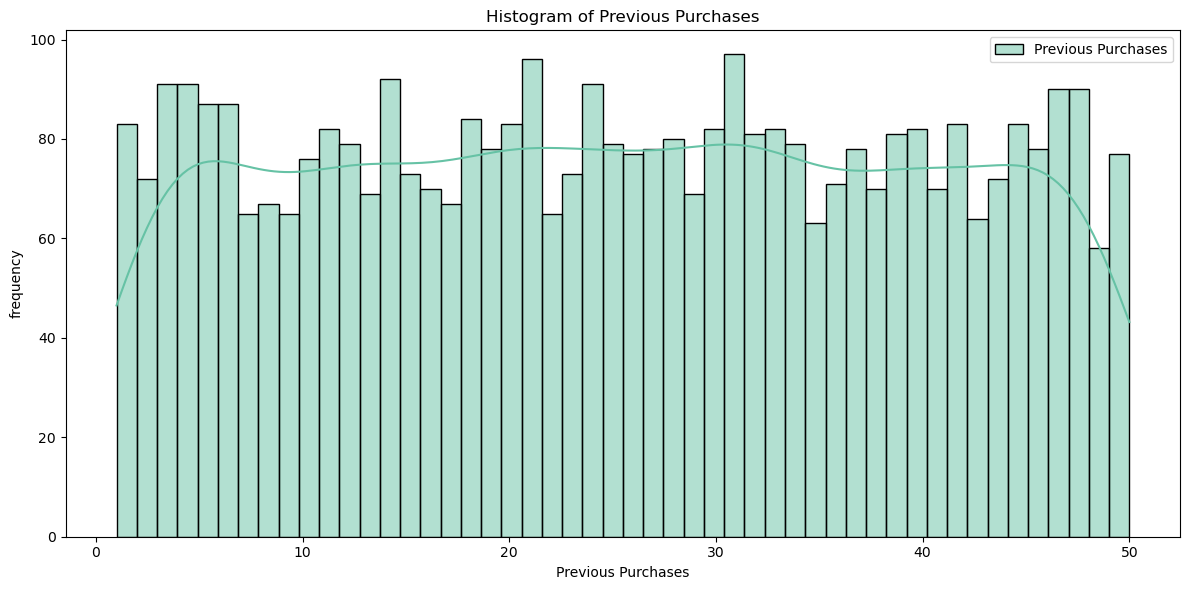

In [35]:
for col in num_cols:
    plt.figure(figsize=(12, 6))
    sns.histplot(df[[col]], kde=True, palette='Set2', bins=50)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.tight_layout()
    plt.show()

### 2. Countplot Of Cat_Cols

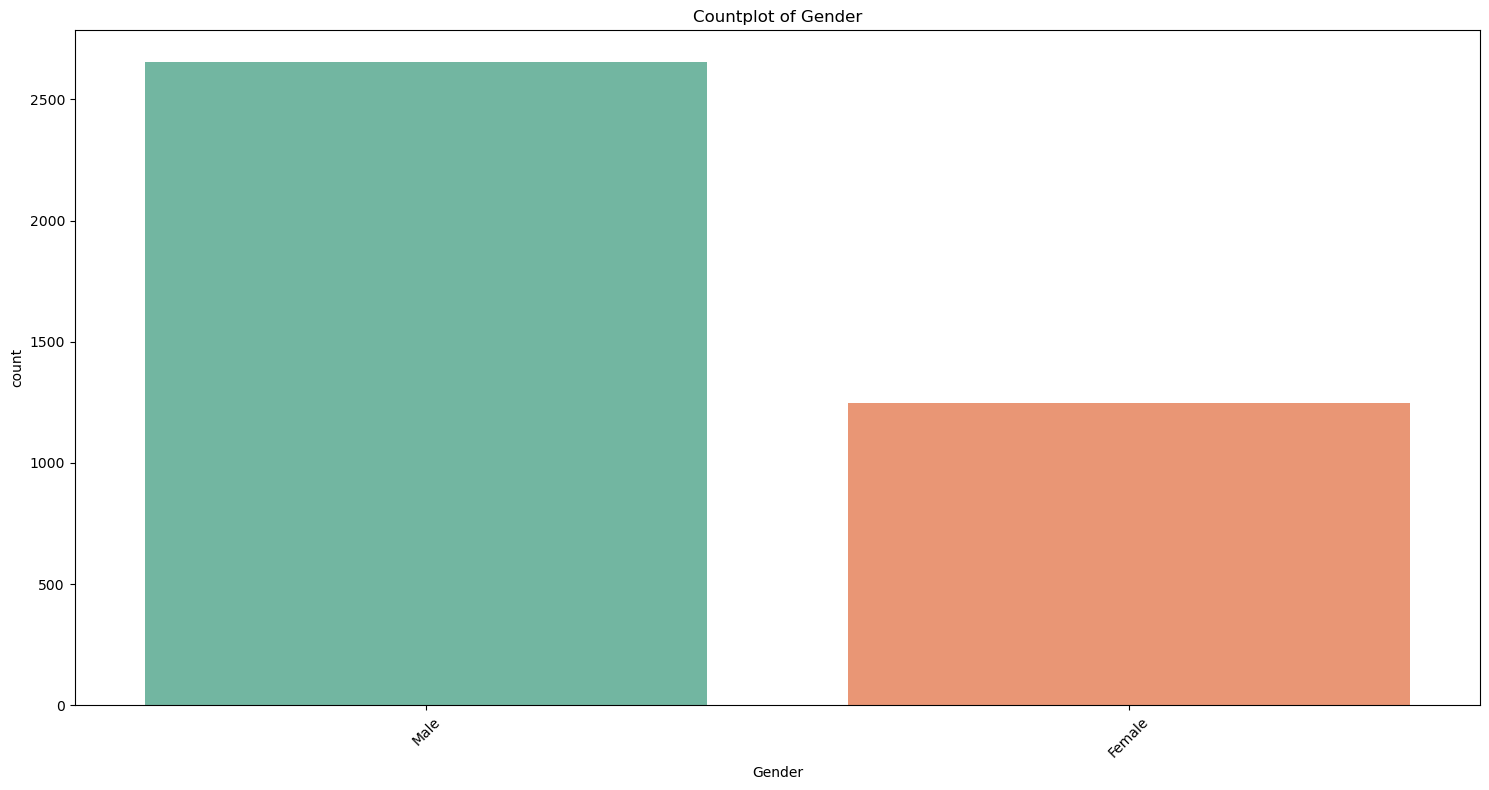

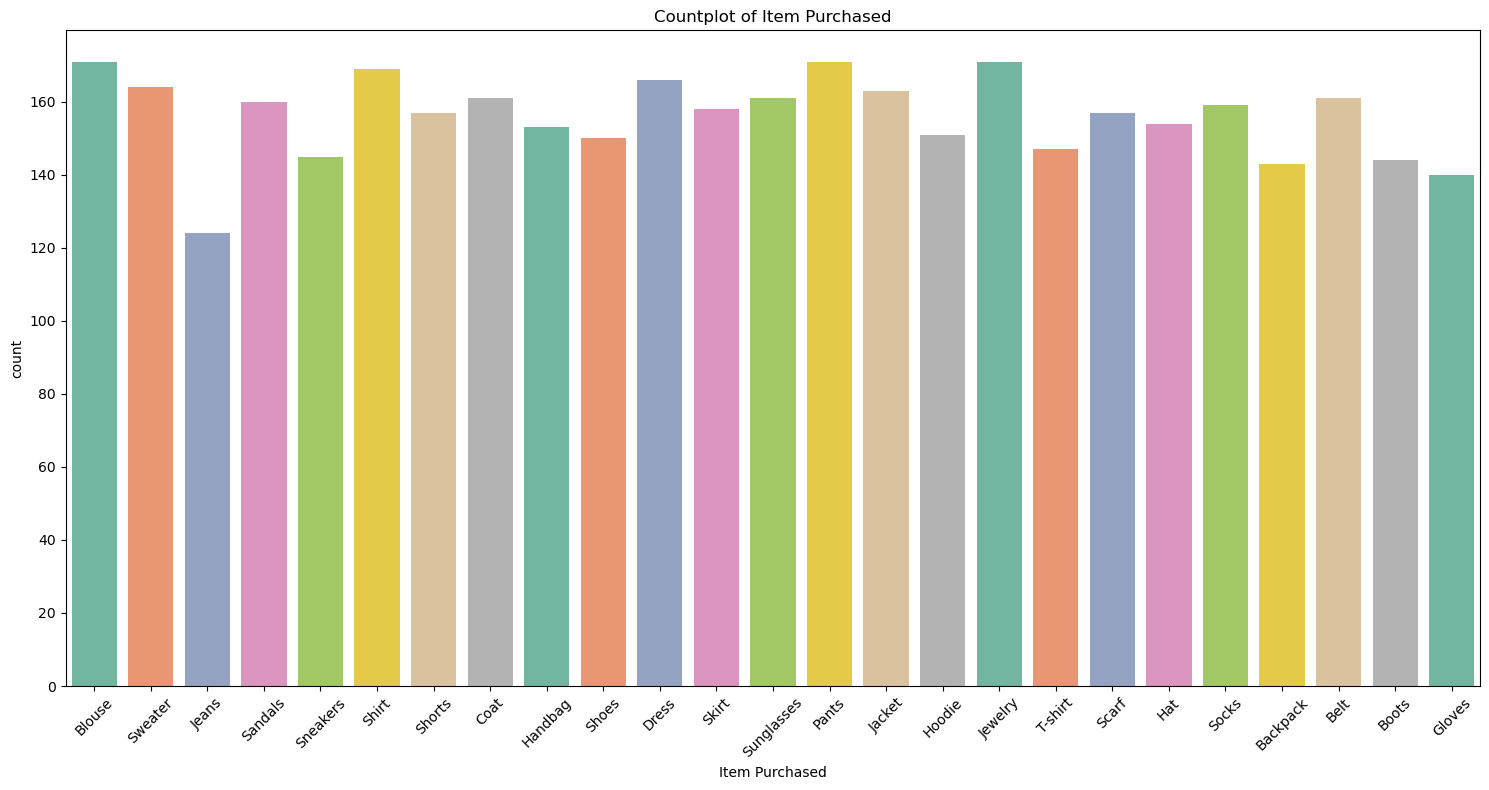

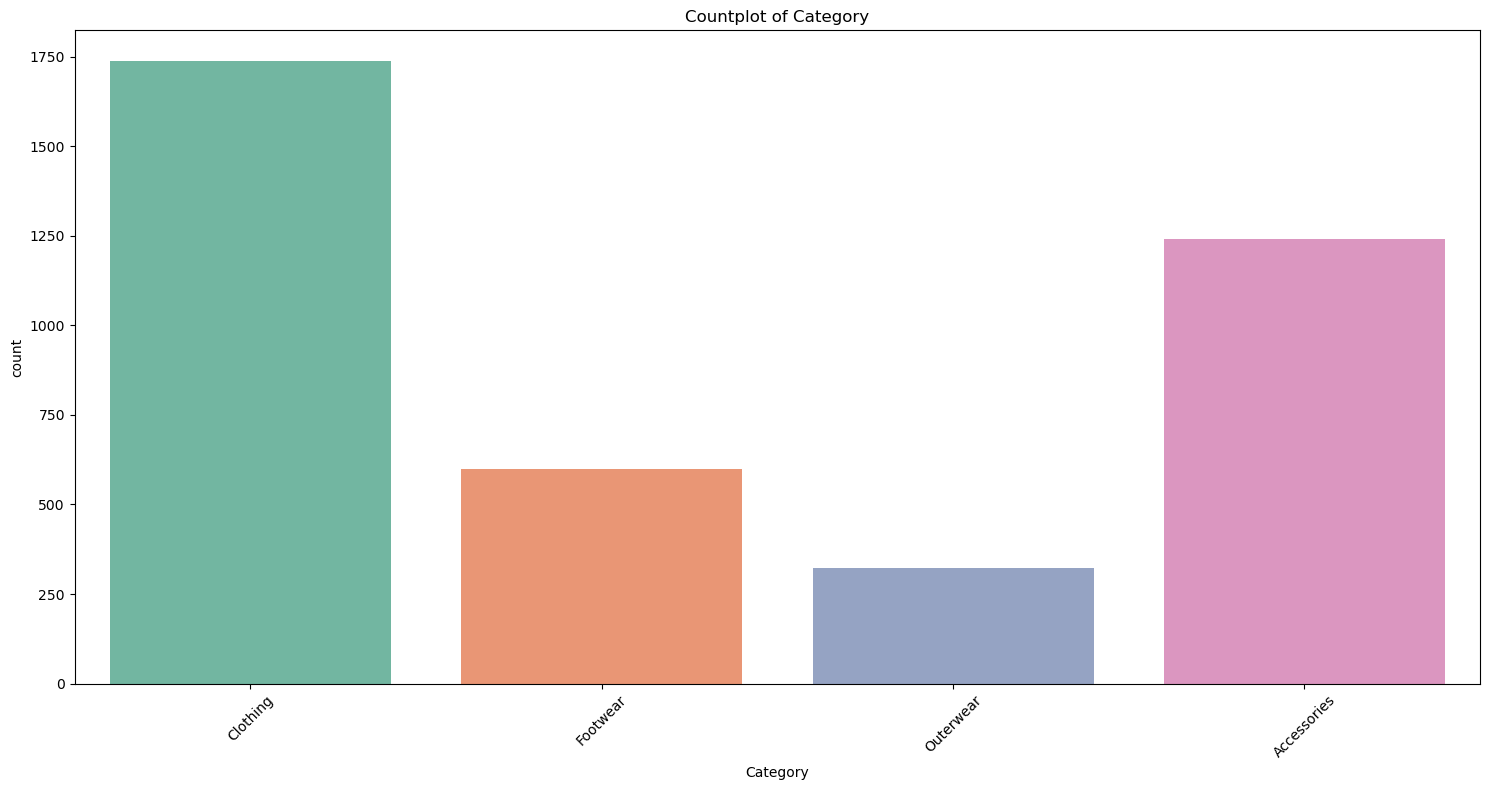

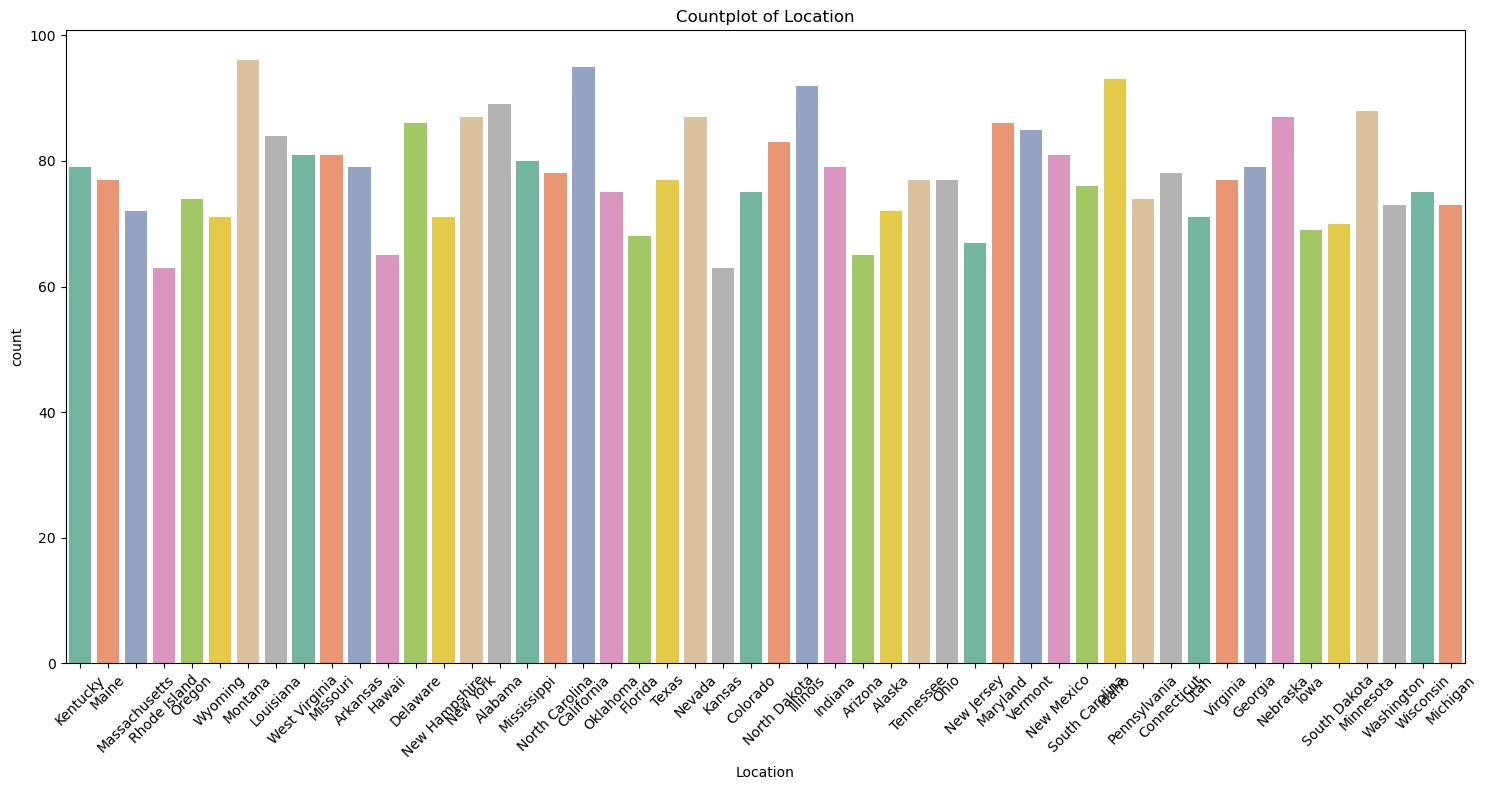

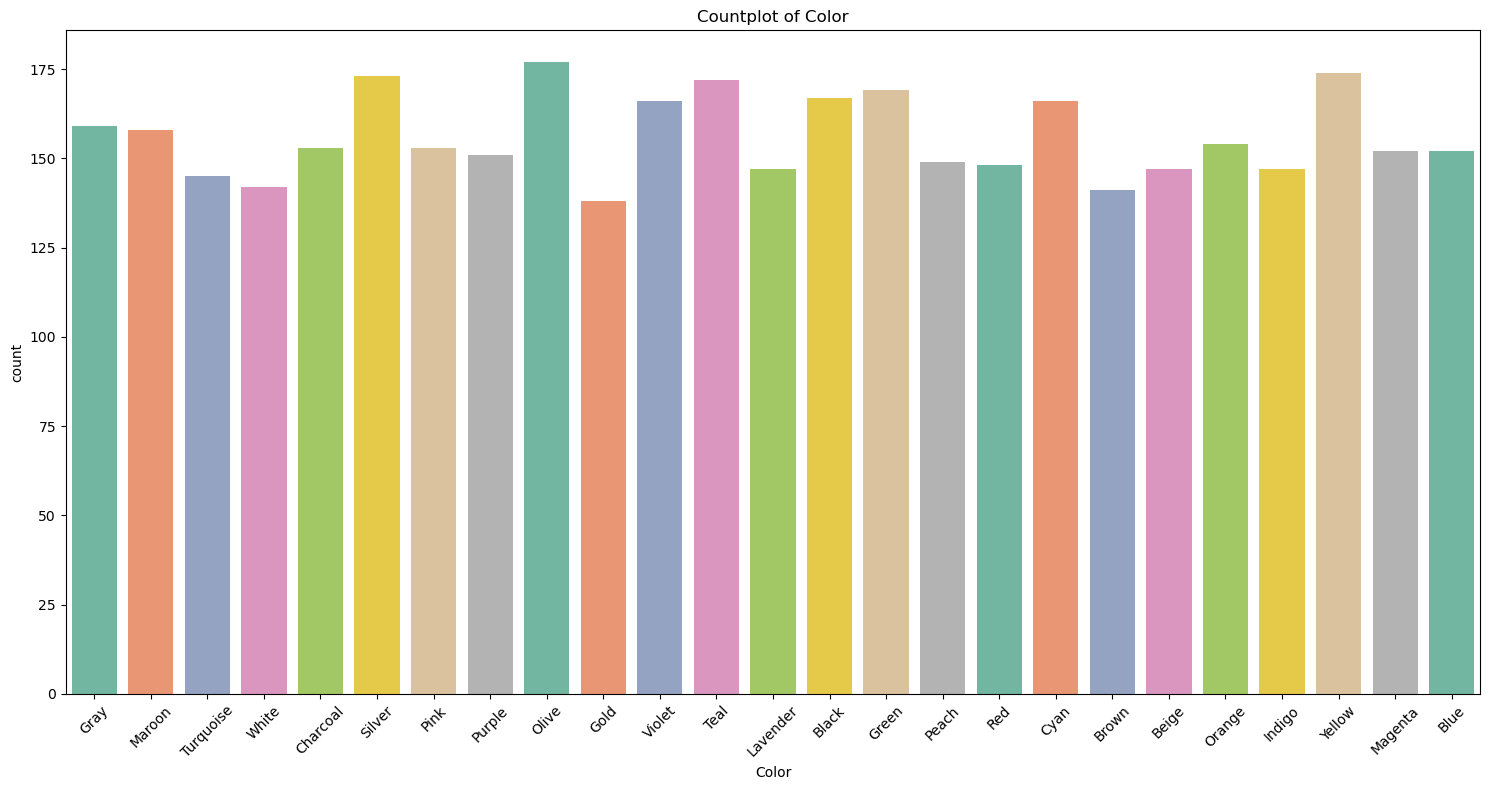

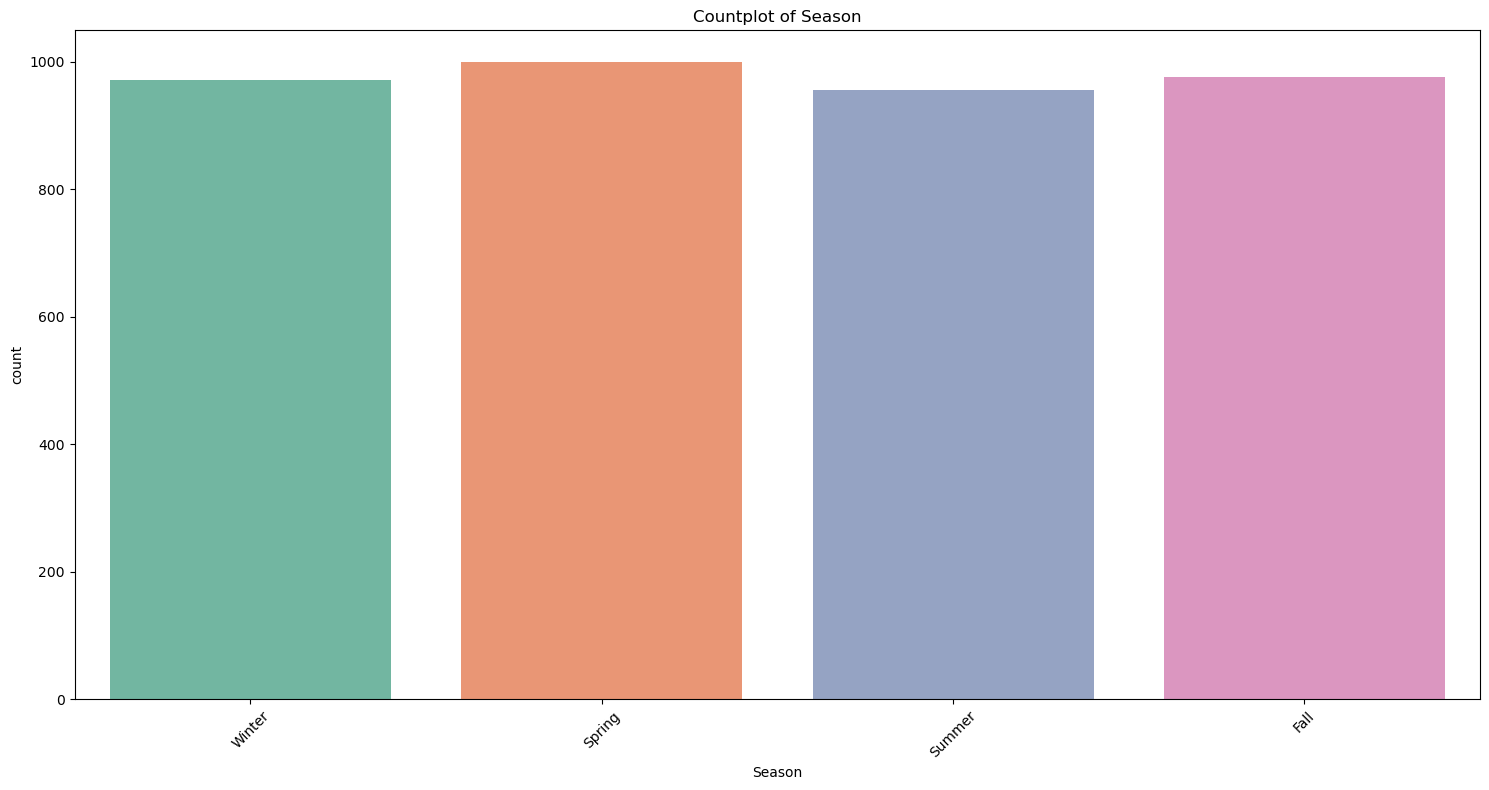

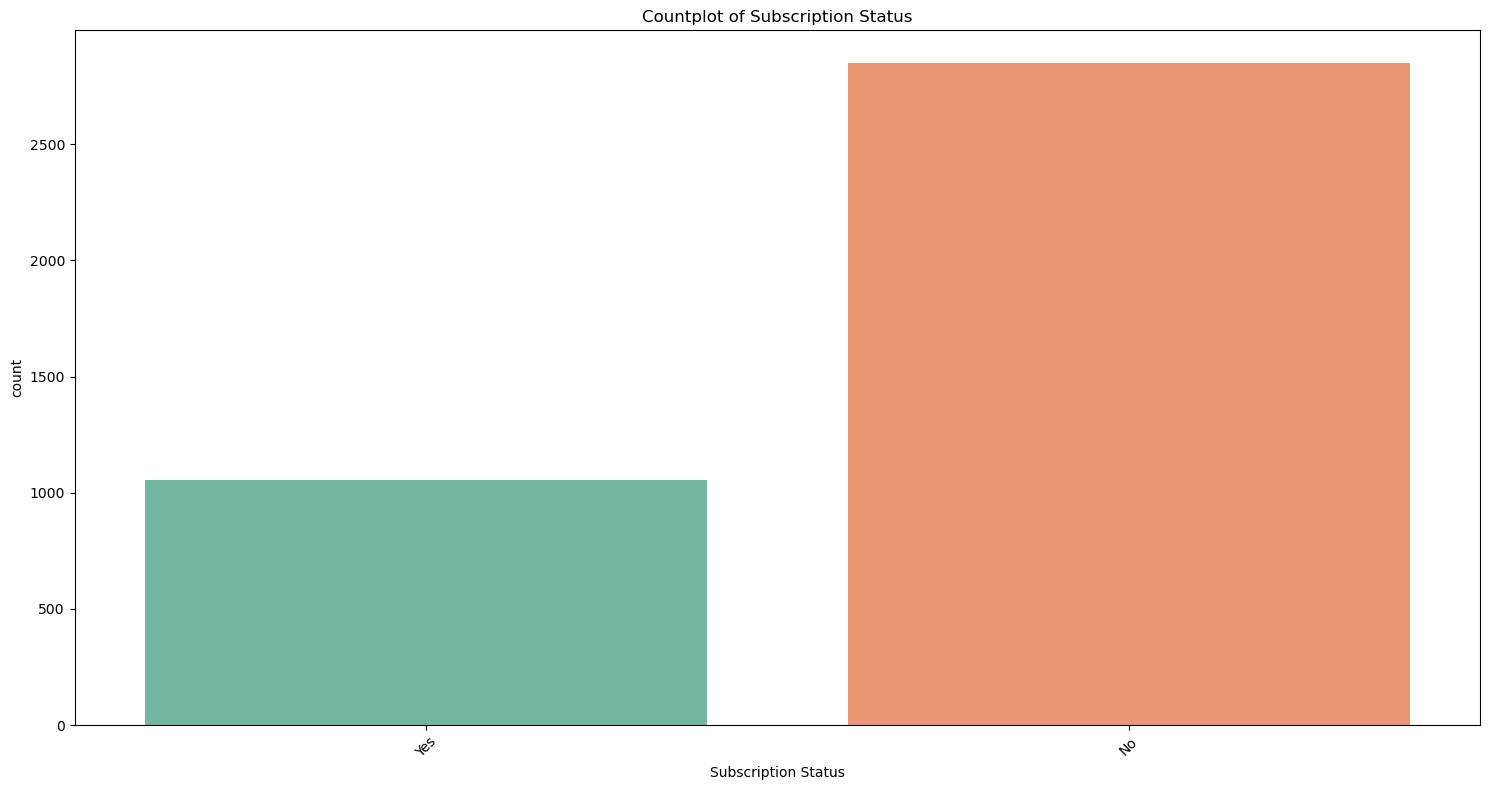

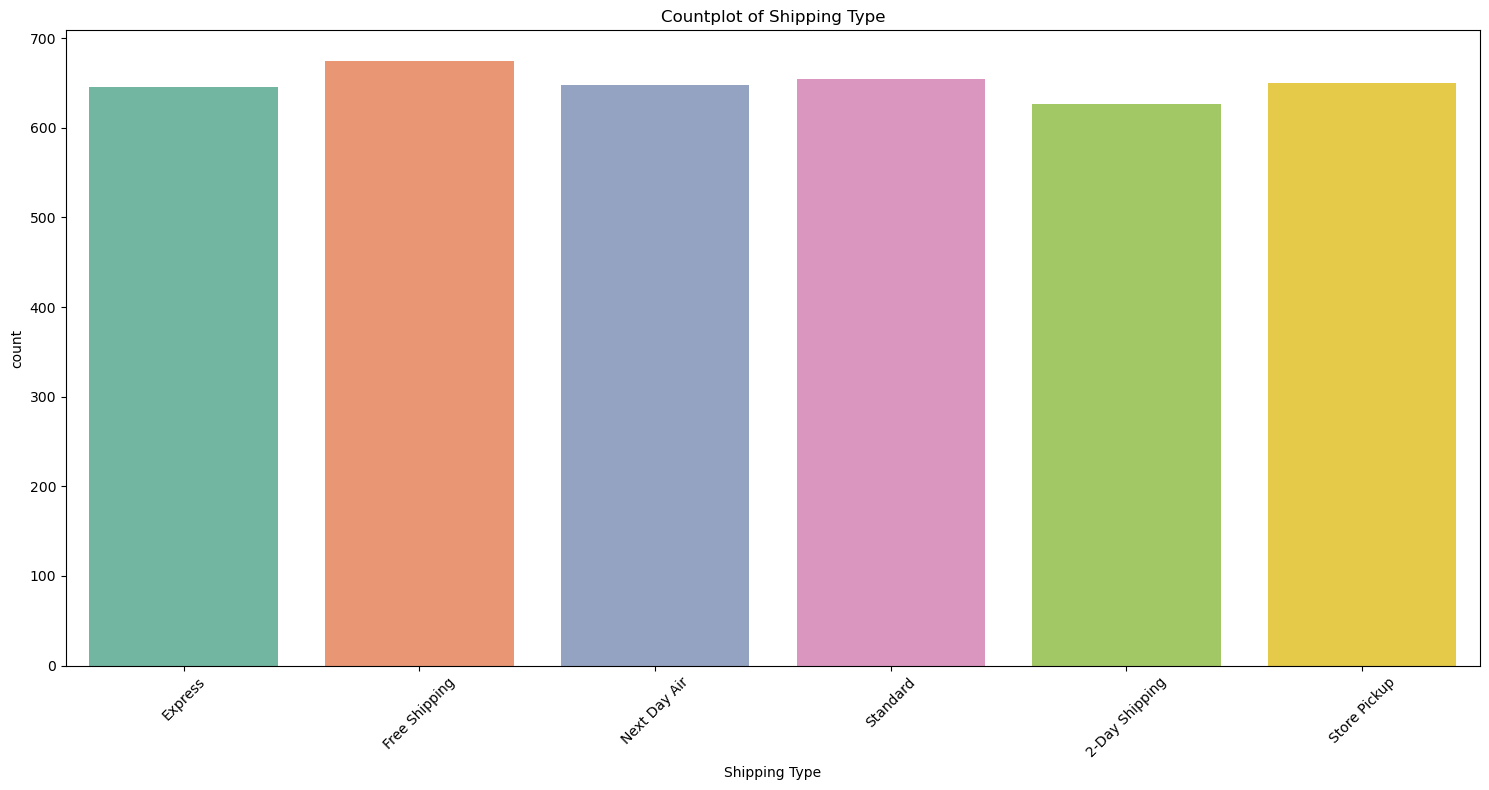

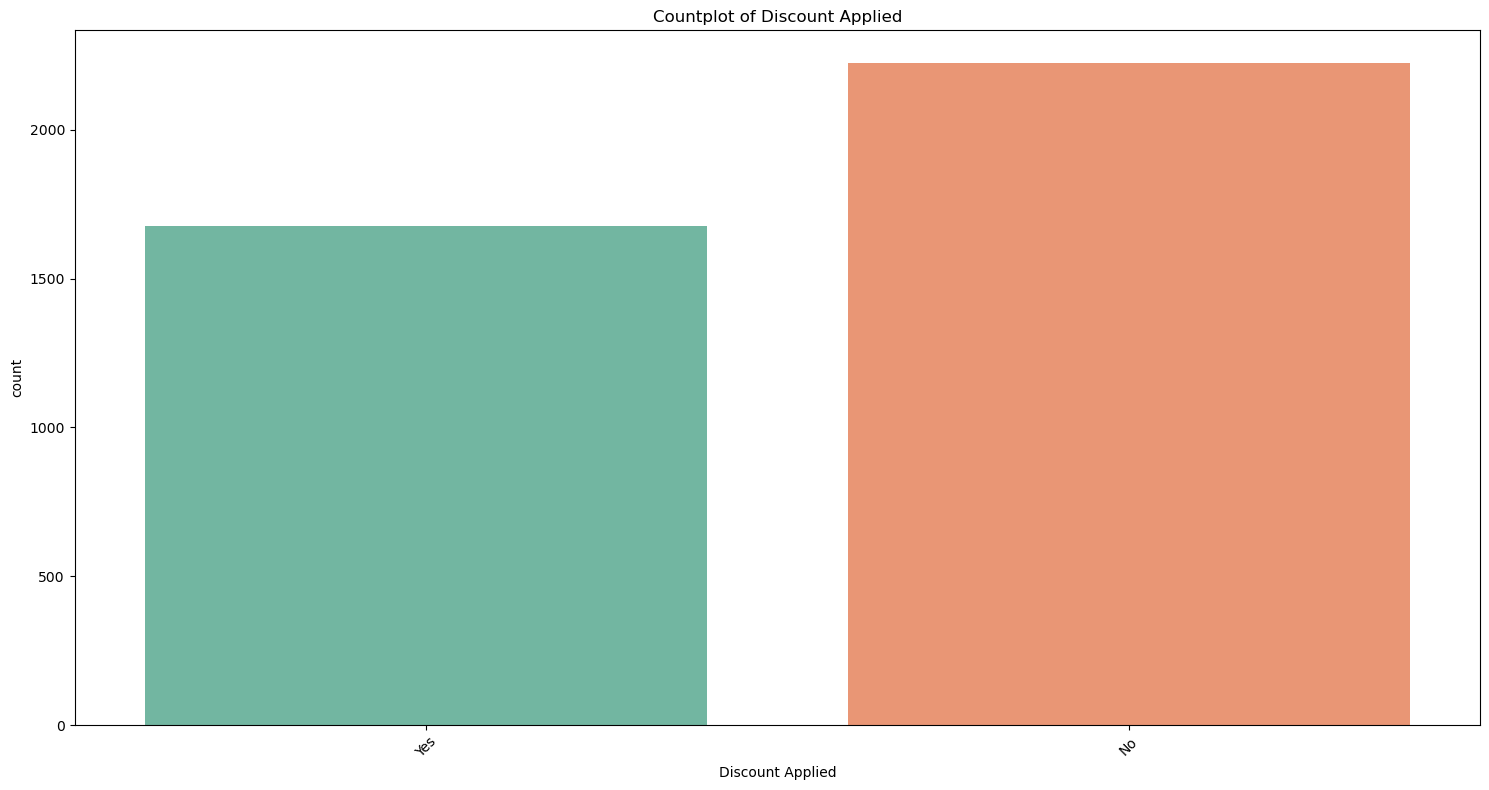

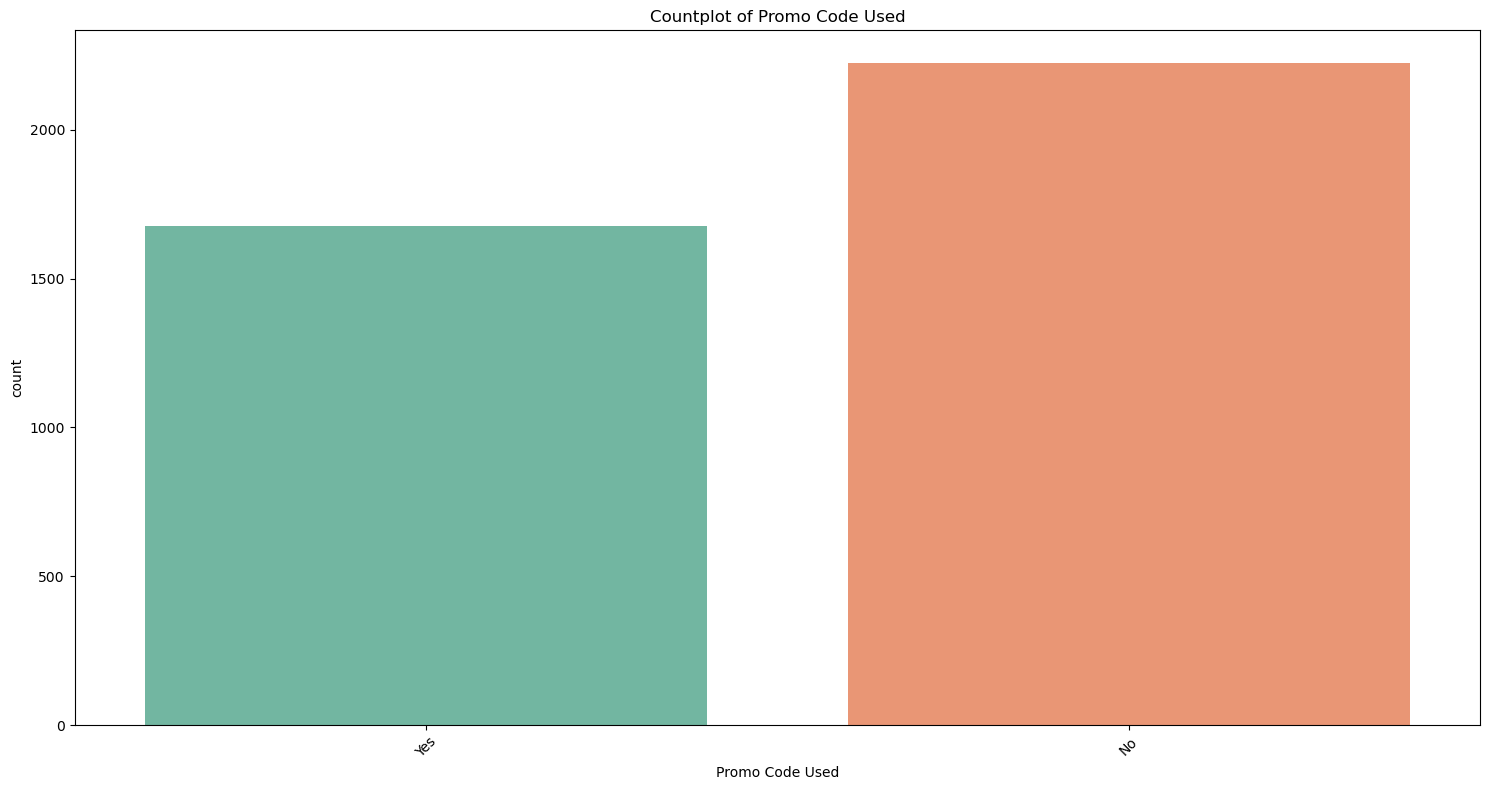

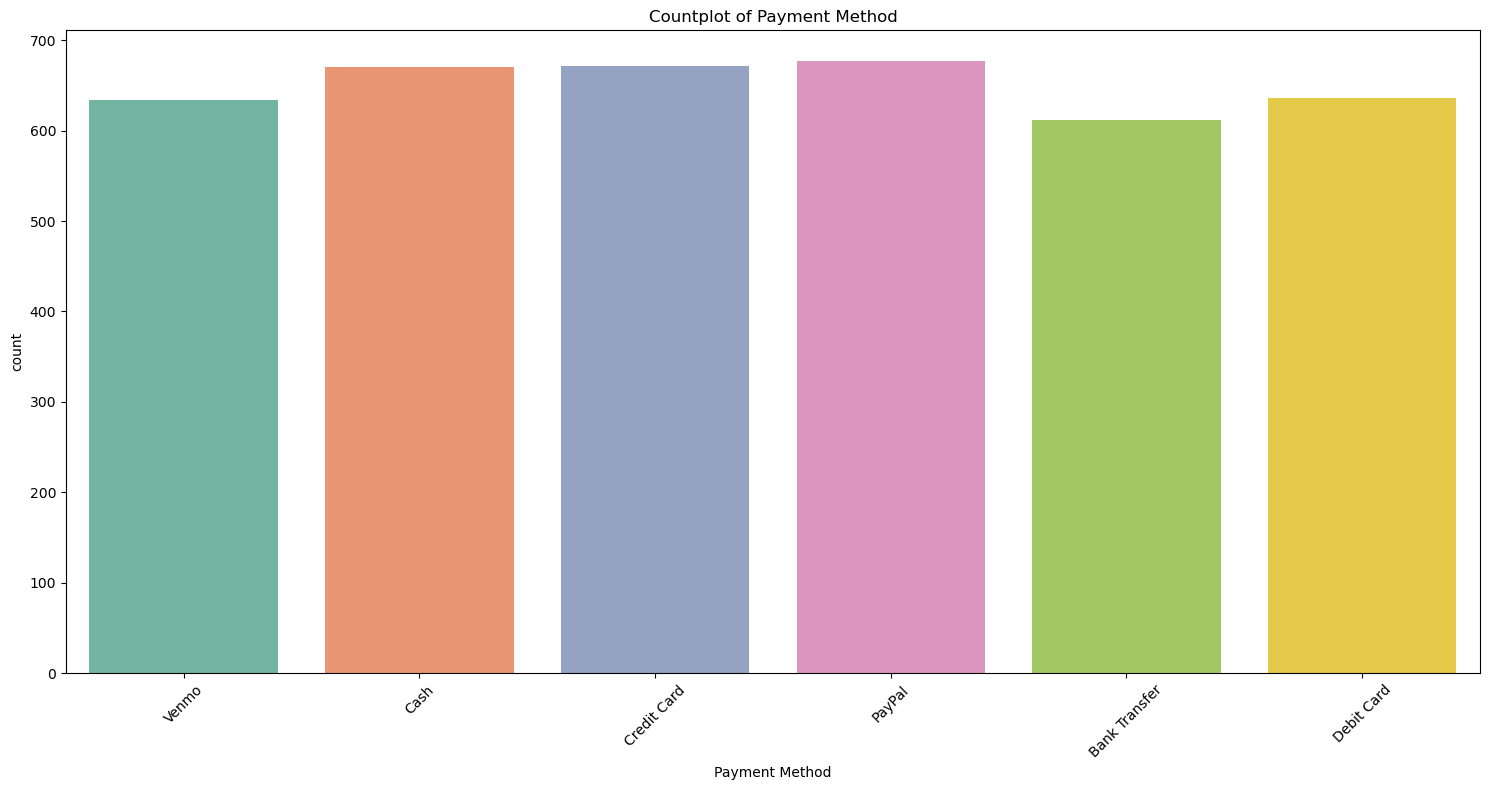

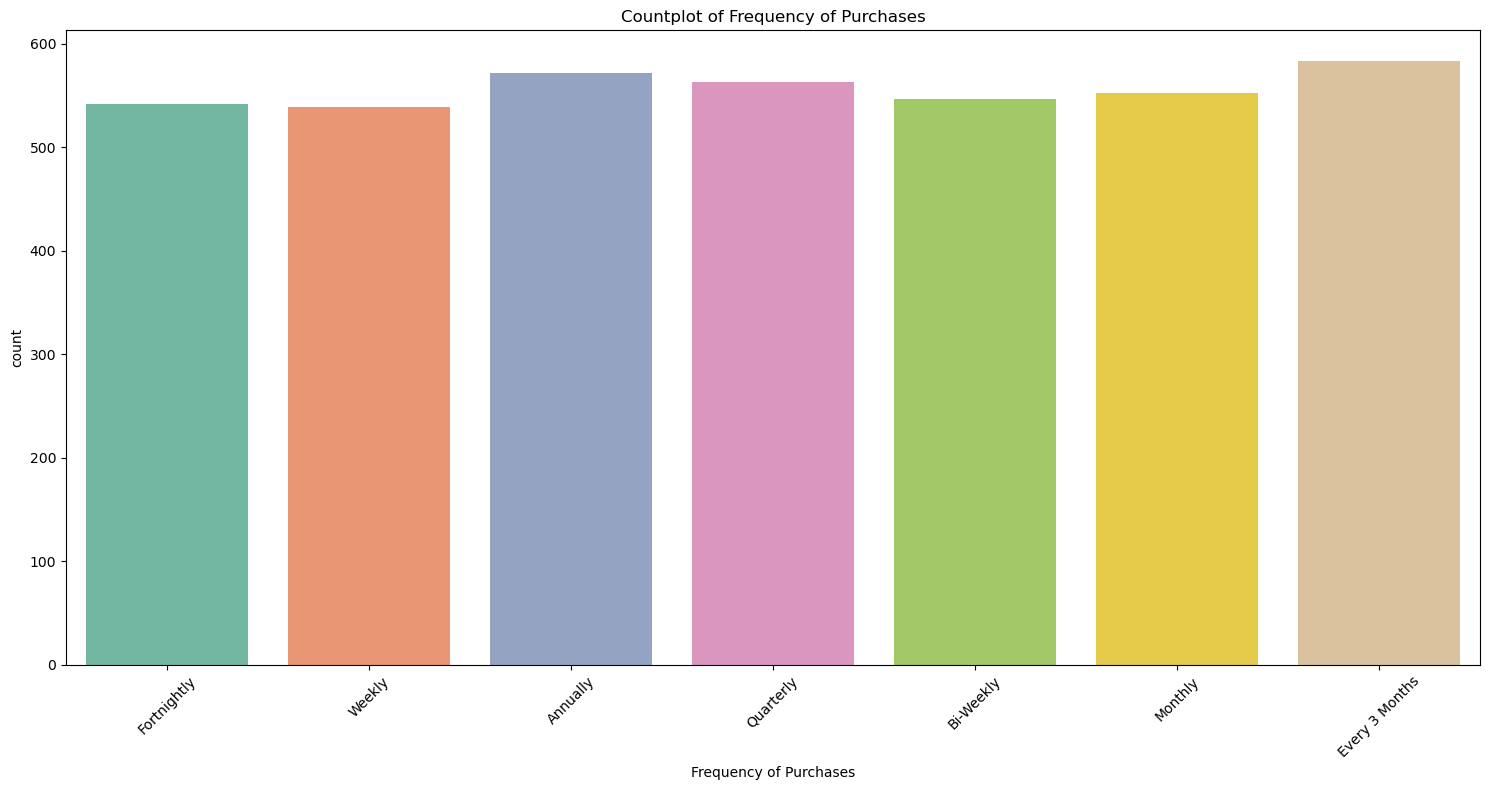

In [37]:
for col in cat_cols:
    plt.figure(figsize=(15, 8))
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### 3. Age vs Purchase Amount (USD)

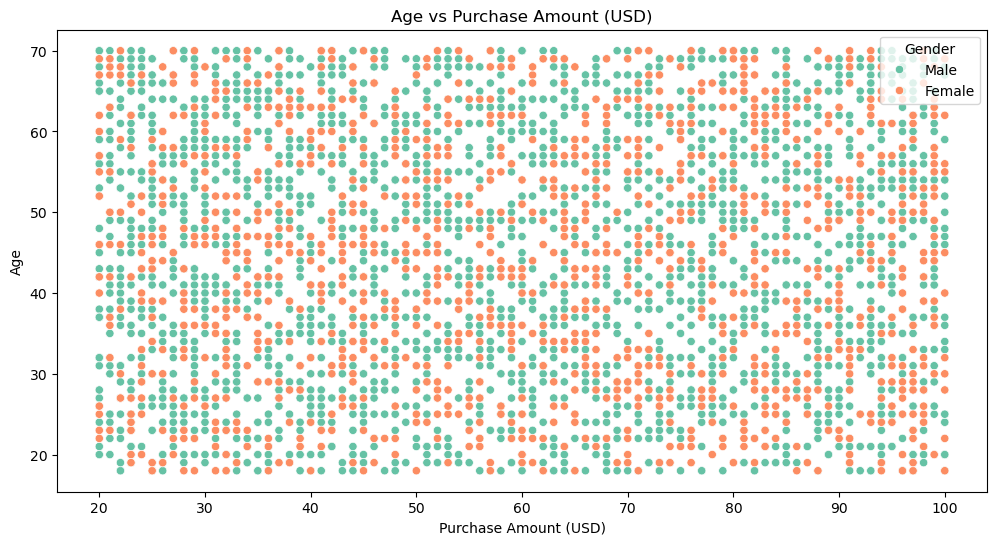

In [39]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Purchase Amount (USD)'], y=df['Age'], hue=df['Gender'], palette='Set2')
plt.title('Age vs Purchase Amount (USD)')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Age')
plt.show()

### 4. Gender vs Purchase Amount (USD)

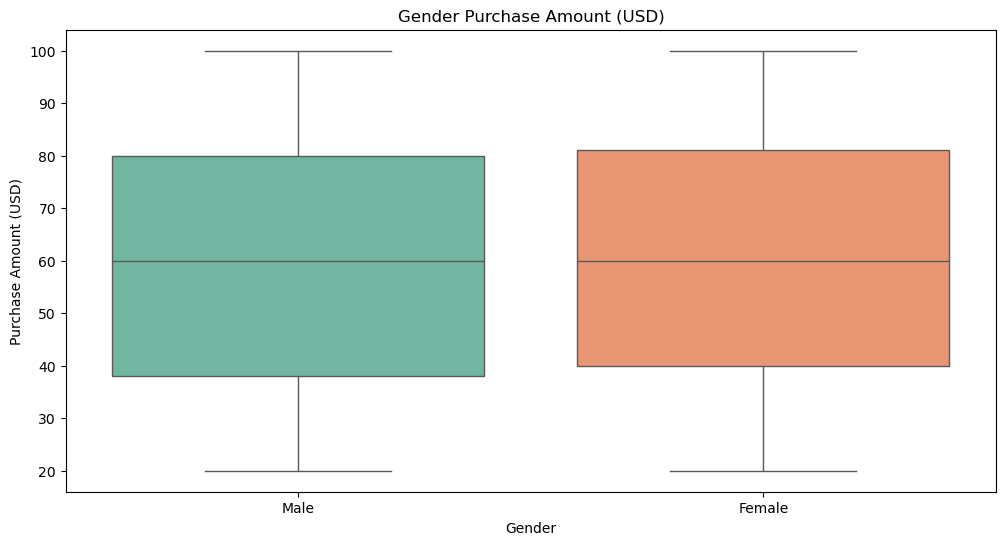

In [40]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Gender'], y=df['Purchase Amount (USD)'], data=df, palette='Set2')
plt.title('Gender Purchase Amount (USD)')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount (USD)')
plt.show()

### 5. Gender By Frequency of Purchases

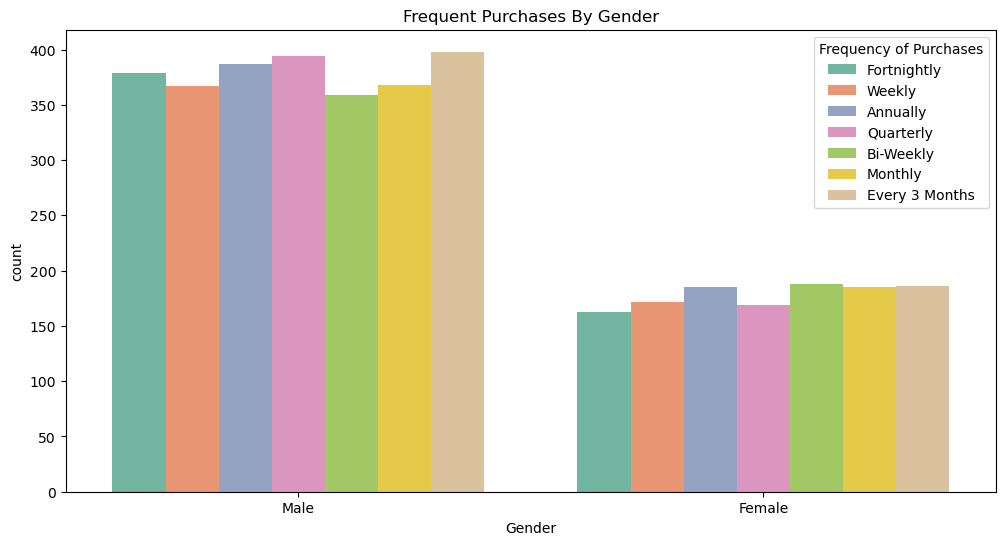

In [41]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df['Gender'], hue=df['Frequency of Purchases'], palette='Set2')
plt.title('Frequent Purchases By Gender')
plt.xlabel('Gender')
plt.ylabel('count')
plt.legend(title='Frequency of Purchases')
plt.show()

### 6. Gender By Payment Method

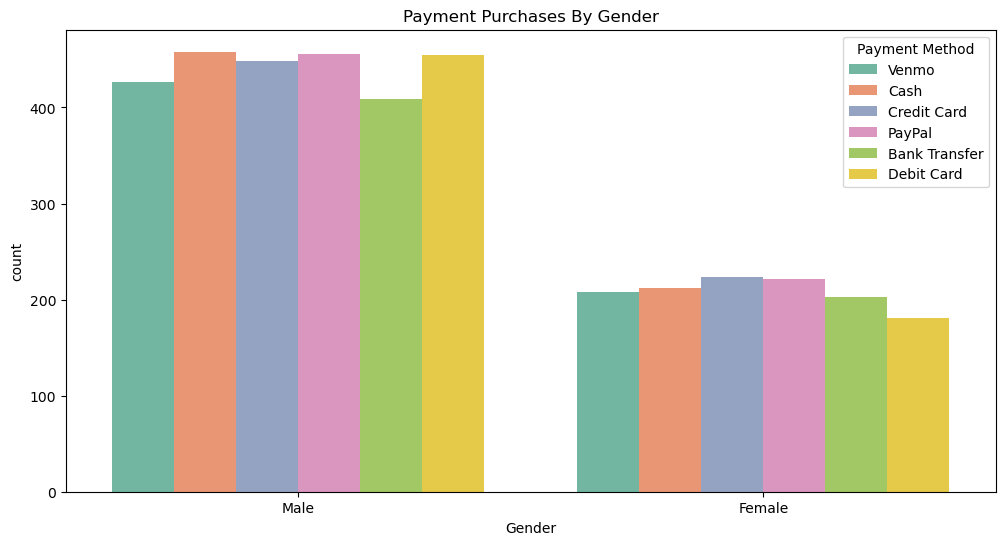

In [42]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df['Gender'], hue=df['Payment Method'], palette='Set2')
plt.title('Payment Purchases By Gender')
plt.xlabel('Gender')
plt.ylabel('count')
plt.legend(title='Payment Method')
plt.show()

### 7. Pair Plot Of Num Cols

<Figure size 800x800 with 0 Axes>

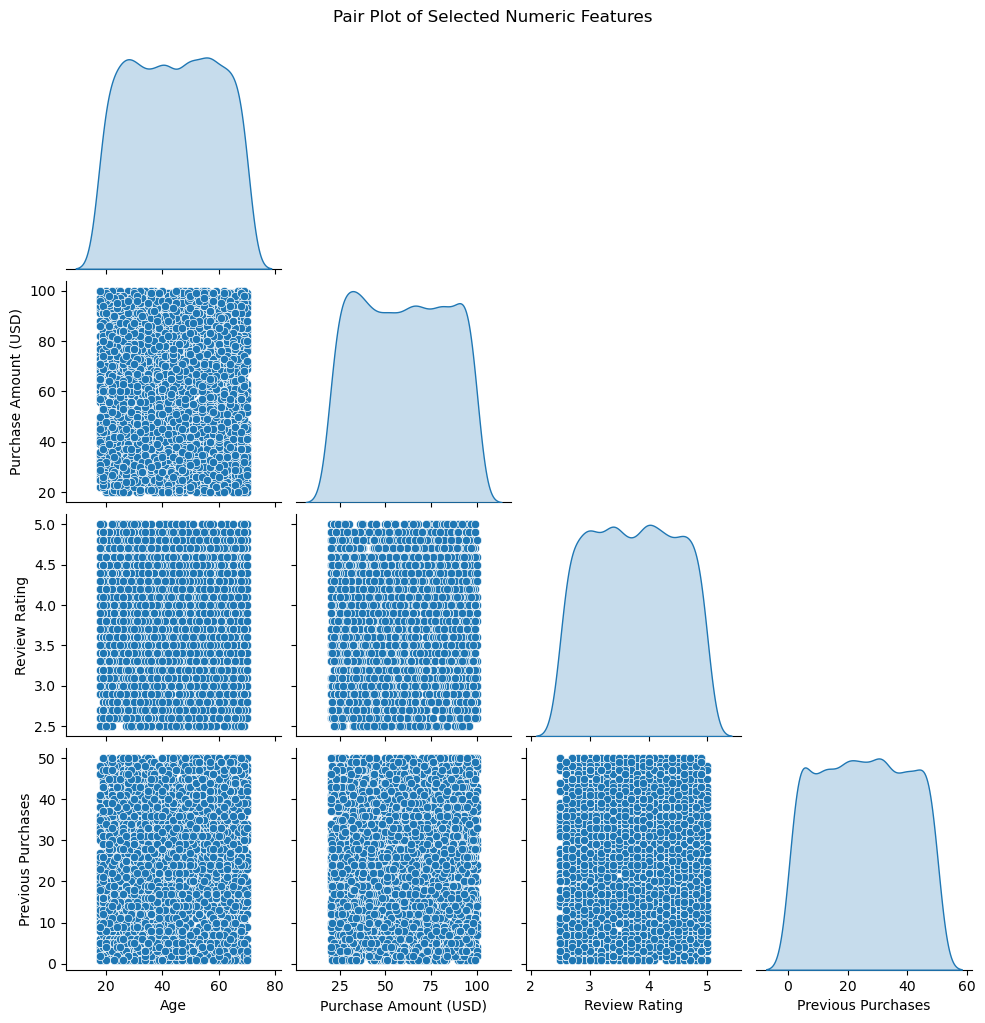

In [45]:
plt.figure(figsize=(8, 8))
subset_cols = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
sns.pairplot(df[subset_cols], diag_kind='kde', corner=True, palette='Set2')
plt.suptitle('Pair Plot of Selected Numeric Features', y=1.02)
plt.show()

### 8. Purchase Amount (USD) vs Review Rating

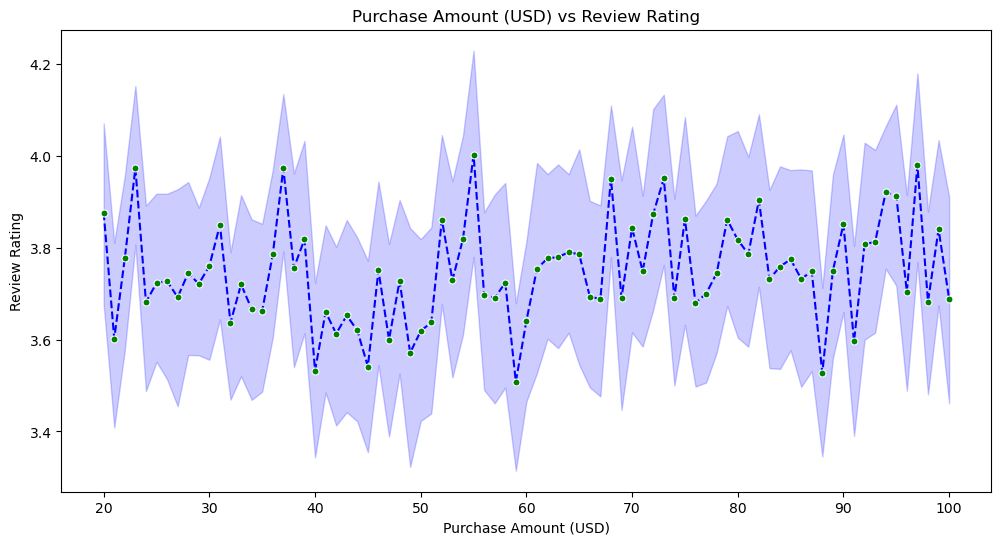

In [48]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['Purchase Amount (USD)'], y=df['Review Rating'], marker='o', linestyle='dashed', markerfacecolor='green', markersize=5, color='blue')
plt.title('Purchase Amount (USD) vs Review Rating')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Review Rating')
plt.show()

### 9. Purchase Amount (USD) vs Previous Purchases

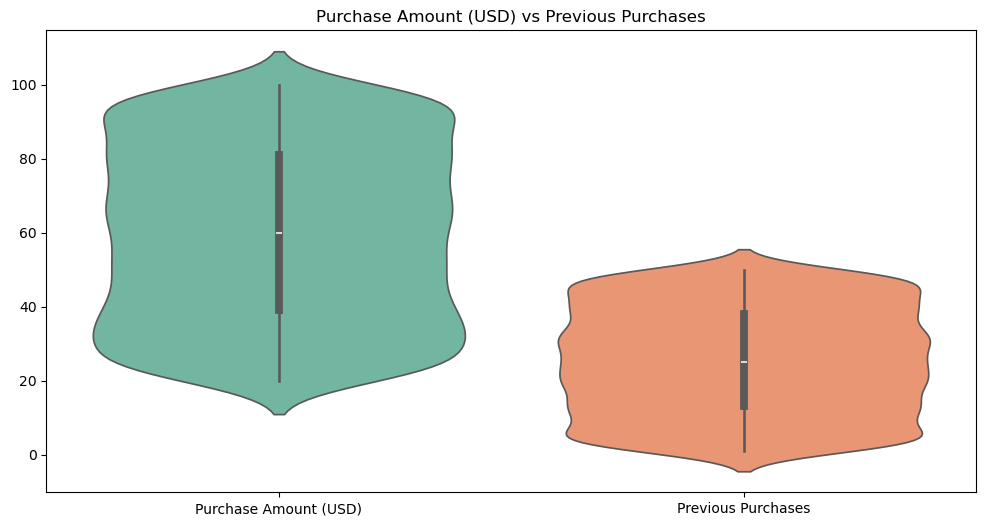

In [49]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df[['Purchase Amount (USD)', 'Previous Purchases']], palette='Set2')
plt.title('Purchase Amount (USD) vs Previous Purchases')
plt.show()

### 9. Correlation Map

In [60]:
df = df.drop(columns=['Customer ID'], errors='ignore')
df = df.drop(columns=['Item Purchased'], errors='ignore')
df = df.drop(columns=['Location'], errors='ignore')
df = df.drop(columns=['Color'], errors='ignore')
df

,Age,Gender,Category,Purchase Amount (USD),Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,55,Male,Clothing,53,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Clothing,64,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Clothing,73,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Footwear,90,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Clothing,49,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,Female,Clothing,28,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,52,Female,Accessories,49,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,46,Female,Accessories,33,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,44,Female,Footwear,77,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [52]:
df['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [53]:
df['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [54]:
df['Subscription Status'].unique()

array(['Yes', 'No'], dtype=object)

In [55]:
df['Shipping Type'].unique()

array(['Express', 'Free Shipping', 'Next Day Air', 'Standard',
       '2-Day Shipping', 'Store Pickup'], dtype=object)

In [56]:
df['Discount Applied'].unique()

array(['Yes', 'No'], dtype=object)

In [57]:
df['Promo Code Used'].unique()

array(['Yes', 'No'], dtype=object)

In [58]:
df['Payment Method'].unique()

array(['Venmo', 'Cash', 'Credit Card', 'PayPal', 'Bank Transfer',
       'Debit Card'], dtype=object)

In [59]:
df['Frequency of Purchases'].unique()

array(['Fortnightly', 'Weekly', 'Annually', 'Quarterly', 'Bi-Weekly',
       'Monthly', 'Every 3 Months'], dtype=object)

In [61]:
val = {'Gender': {'Male': 0, 'Female': 1}, 
       'Category': {'Clothing': 0, 'Footwear': 1, 'Outerwear': 2, 'Accessories': 3},
       'Season': {'Winter': 0, 'Spring': 1, 'Summer': 2, 'Fall': 3},
       'Subscription Status': {'No': 0, 'Yes': 1},
       'Shipping Type': {'Free Shipping': 0, 'Express': 1, 'Next Day Air': 2, 'Standard': 3, '2-Day Shipping': 4, 'Store Pickup': 5},
       'Discount Applied': {'No': 0, 'Yes': 1},
       'Promo Code Used': {'No': 0, 'Yes': 1},
       'Payment Method': {'Venmo': 0, 'Cash': 1, 'Credit Card': 2, 'PayPal': 3, 'Bank Transfer': 4, 'Debit Card': 5},
       'Frequency of Purchases': {'Fortnightly': 0, 'Weekly': 1, 'Annually': 2, 'Bi-Weekly': 3, 'Monthly': 4, 'Every 3 Months': 5}}
df.replace(val, inplace=True)
df

,Age,Gender,Category,Purchase Amount (USD),Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,55,0,0,53,0,3.1,1,1,1,1,14,0,0
1,19,0,0,64,0,3.1,1,1,1,1,2,1,0
2,50,0,0,73,1,3.1,1,0,1,1,23,2,1
3,21,0,1,90,1,3.5,1,2,1,1,49,3,1
4,45,0,0,49,1,2.7,1,0,1,1,31,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,1,0,28,2,4.2,0,4,0,0,32,0,1
3896,52,1,3,49,1,4.5,0,5,0,0,41,4,3
3897,46,1,3,33,1,2.9,0,3,0,0,24,0,Quarterly
3898,44,1,1,77,2,3.8,0,1,0,0,24,0,1


In [62]:
val = {'Frequency of Purchases': {'Quarterly': 6}}
df.replace(val, inplace=True)
df

,Age,Gender,Category,Purchase Amount (USD),Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,55,0,0,53,0,3.1,1,1,1,1,14,0,0
1,19,0,0,64,0,3.1,1,1,1,1,2,1,0
2,50,0,0,73,1,3.1,1,0,1,1,23,2,1
3,21,0,1,90,1,3.5,1,2,1,1,49,3,1
4,45,0,0,49,1,2.7,1,0,1,1,31,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,1,0,28,2,4.2,0,4,0,0,32,0,1
3896,52,1,3,49,1,4.5,0,5,0,0,41,4,3
3897,46,1,3,33,1,2.9,0,3,0,0,24,0,6
3898,44,1,1,77,2,3.8,0,1,0,0,24,0,1


In [63]:
correlation = df.corr()

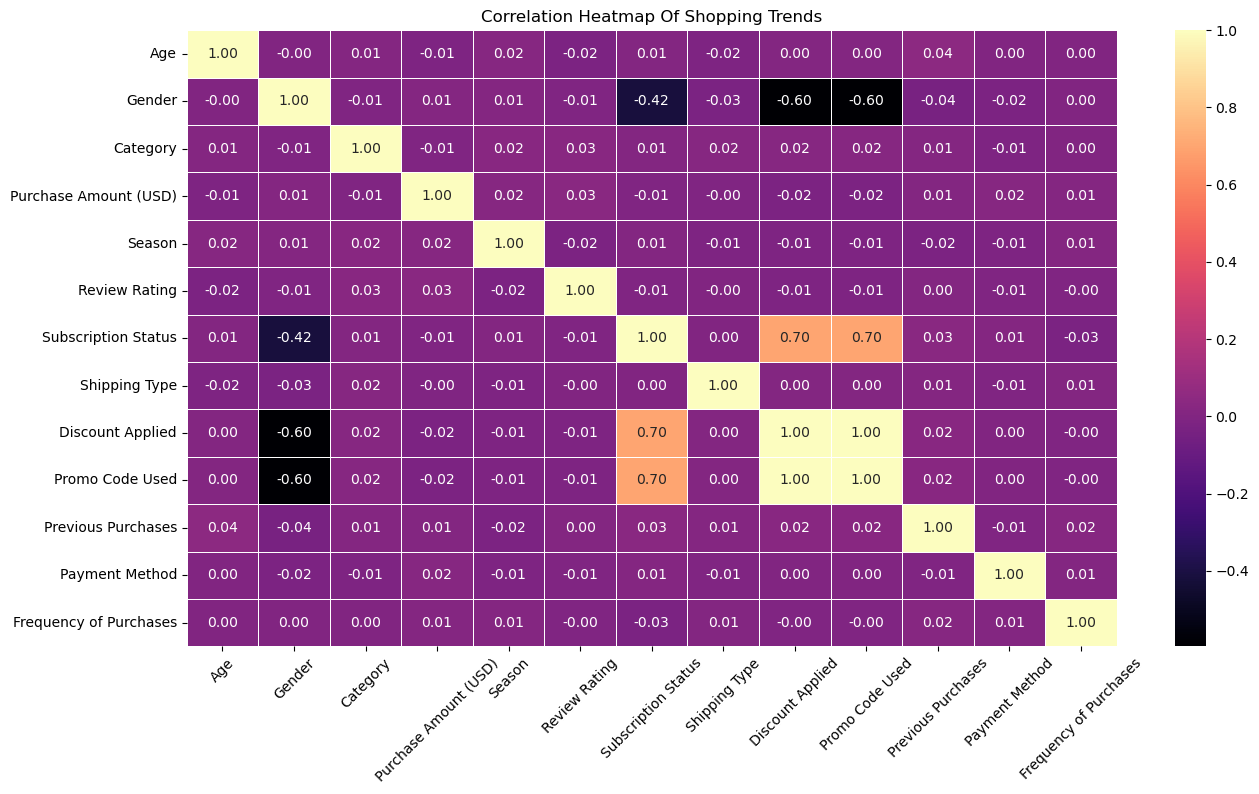

In [65]:
plt.figure(figsize=(15, 8))
sns.heatmap(correlation, annot=True, cmap='magma', fmt='.2f', linewidth=0.5)
plt.title('Correlation Heatmap Of Shopping Trends')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Predictive Modeling

### 1. Train Test Split

In [69]:
df

,Age,Gender,Category,Purchase Amount (USD),Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,55,0,0,53,0,3.1,1,1,1,1,14,0,0
1,19,0,0,64,0,3.1,1,1,1,1,2,1,0
2,50,0,0,73,1,3.1,1,0,1,1,23,2,1
3,21,0,1,90,1,3.5,1,2,1,1,49,3,1
4,45,0,0,49,1,2.7,1,0,1,1,31,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,1,0,28,2,4.2,0,4,0,0,32,0,1
3896,52,1,3,49,1,4.5,0,5,0,0,41,4,3
3897,46,1,3,33,1,2.9,0,3,0,0,24,0,6
3898,44,1,1,77,2,3.8,0,1,0,0,24,0,1


In [71]:
features = ['Age', 'Gender', 'Category', 'Purchase Amount (USD)', 'Season', 'Review Rating', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Previous Purchases', 'Payment Method', 'Frequency of Purchases']
target = 'Subscription Status'

X = df[features]
y = df[target]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(3120, 12) (780, 12)


### 2. Models

In [75]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'CatBoost': CatBoostRegressor(),
    'LogisticRegression': LogisticRegression(),
}

#### Train and Evaluate Models

In [78]:
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    
    results[name] = {'RMSE': rmse, 'MAE': mae}
    print(f"{name} - RMSE: {rmse:.4f}, MAE: {mae:.4f}")

Linear Regression - RMSE: 0.3293, MAE: 0.2230
Random Forest - RMSE: 0.3345, MAE: 0.2136
Learning rate set to 0.049007
0:	learn: 0.4316290	total: 162ms	remaining: 2m 42s
1:	learn: 0.4218056	total: 164ms	remaining: 1m 21s
2:	learn: 0.4129170	total: 165ms	remaining: 55s
3:	learn: 0.4045622	total: 167ms	remaining: 41.6s
4:	learn: 0.3967594	total: 169ms	remaining: 33.5s
5:	learn: 0.3896278	total: 170ms	remaining: 28.2s
6:	learn: 0.3830700	total: 172ms	remaining: 24.3s
7:	learn: 0.3768414	total: 173ms	remaining: 21.5s
8:	learn: 0.3711634	total: 174ms	remaining: 19.2s
9:	learn: 0.3659262	total: 175ms	remaining: 17.3s
10:	learn: 0.3611457	total: 176ms	remaining: 15.9s
11:	learn: 0.3566914	total: 179ms	remaining: 14.7s
12:	learn: 0.3525790	total: 181ms	remaining: 13.7s
13:	learn: 0.3486972	total: 182ms	remaining: 12.8s
14:	learn: 0.3452370	total: 184ms	remaining: 12.1s
15:	learn: 0.3419591	total: 186ms	remaining: 11.4s
16:	learn: 0.3388497	total: 187ms	remaining: 10.8s
17:	learn: 0.3361593	tota

### Visualize Model Performance

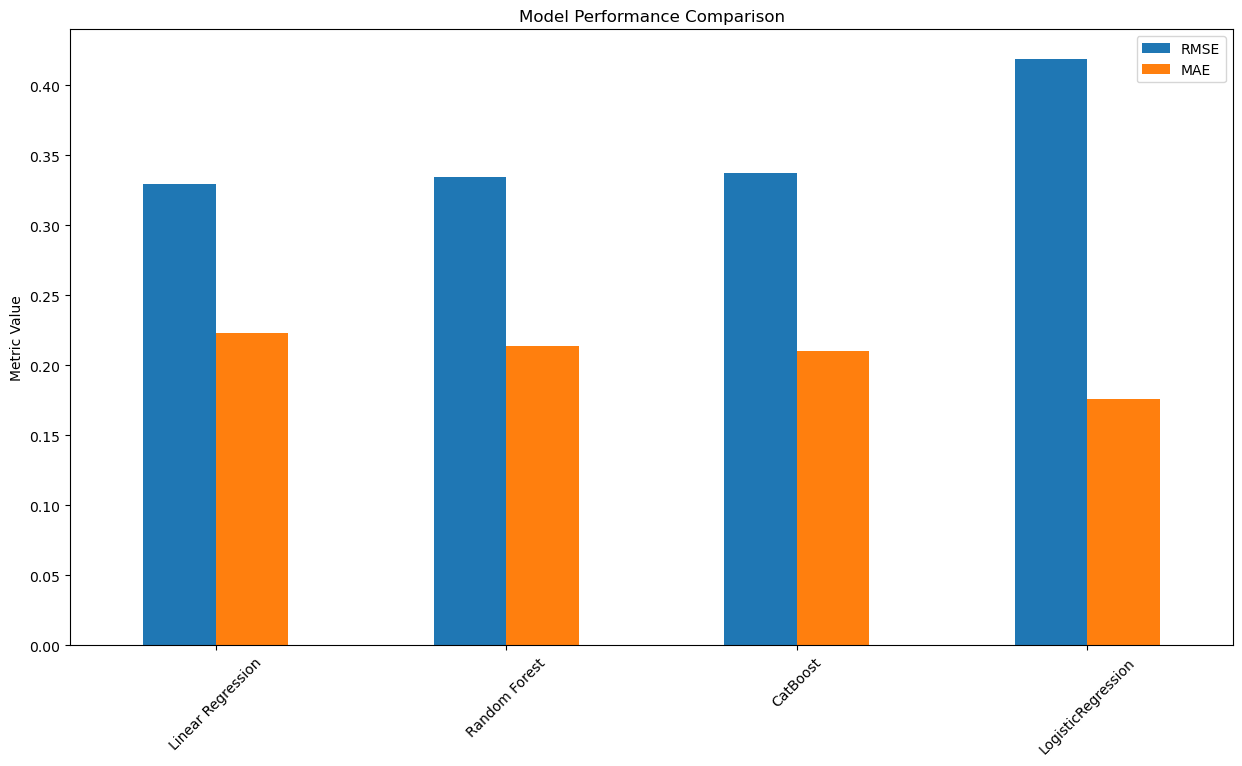

In [79]:
plt.figure(figsize=(15, 8))
results_df = pd.DataFrame(results).T
results_df.plot(kind='bar', ax=plt.gca())
plt.title('Model Performance Comparison')
plt.ylabel('Metric Value')
plt.xticks(rotation=45)
plt.show()